In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.append('../..')
from seismiqb import plot_image

In [3]:
shape = (50, 50)

image_0 = np.random.normal(loc=np.random.rand(), size=shape)
image_1 = np.random.normal(scale=np.random.rand(), size=shape)

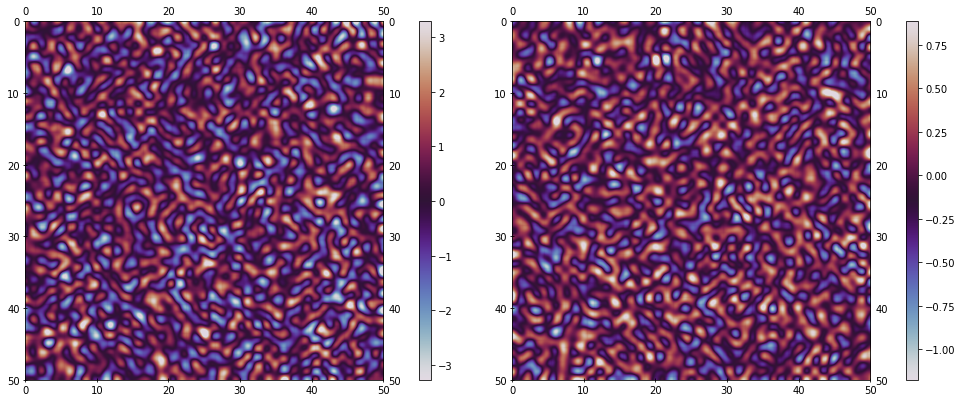

In [4]:
plot_image([image_0, image_1], figsize=(16,8), cmap='twilight', interpolation='sinc', colorbar=True, separate=True)

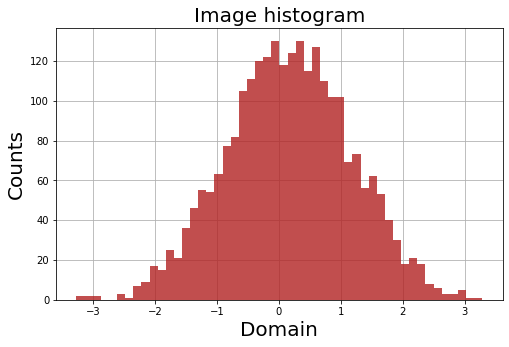

In [5]:
figure_params = {'mode' : 'hist'}

annotation_params = {
    'title_label' : 'Image histogram',
    'xlabel': 'Domain',
    'ylabel': 'Counts',
    'grid': True,
}

plot_image(image_0, **annotation_params, **figure_params)

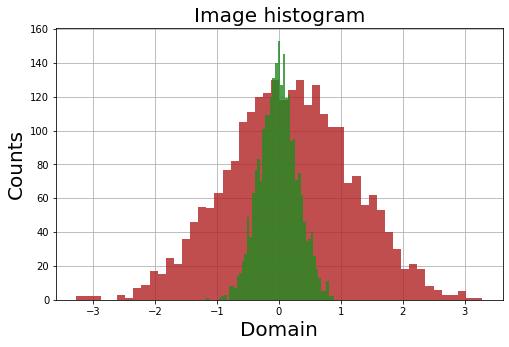

In [6]:
plot_image([image_0, image_1], **annotation_params, **figure_params)

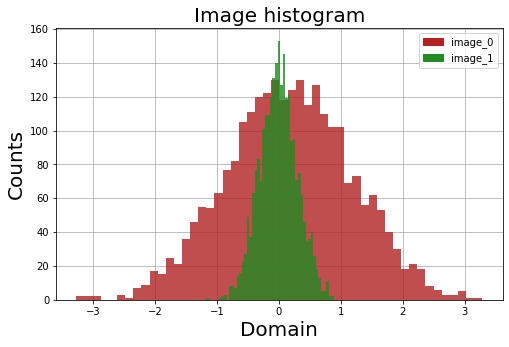

In [7]:
annotation_params['legend_label'] = ['image_0', 'image_1']

plot_image([image_0, image_1], **annotation_params, **figure_params)

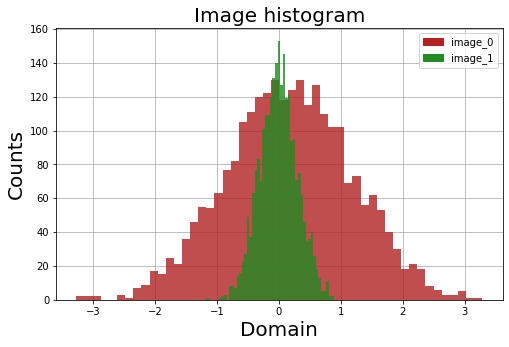

In [8]:
hist_params = {'orientation': 'vertical'}

plot_image([image_0, image_1], **hist_params, **annotation_params, **figure_params, return_figure=False)

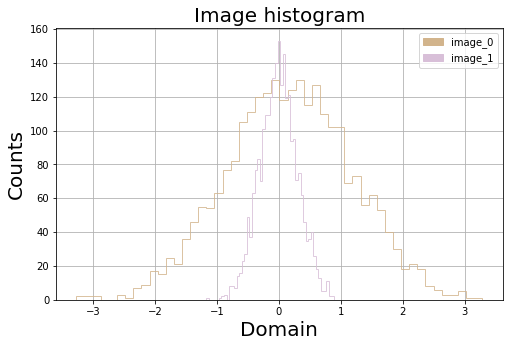

In [9]:
hist_params = {
    'color': ['tan', 'thistle'],
    'histtype': 'step'
}

plot_image([image_0, image_1], **hist_params, **annotation_params, **figure_params)

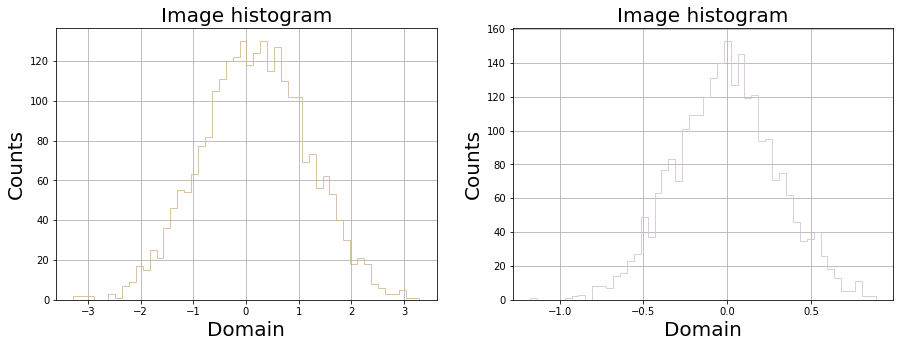

In [10]:
figure_params['figsize'] = (15, 5)

annotation_params['legend_label'] = None

plot_image([image_0, image_1], separate=True, **hist_params, **annotation_params, **figure_params)

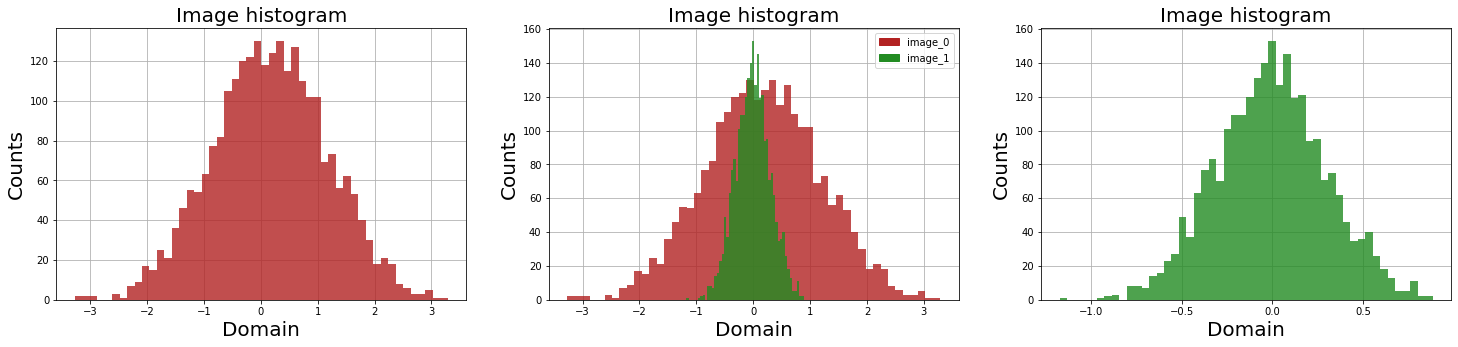

In [11]:
figure_params['figsize'] = (25, 5)
color_0, color_1 = 'firebrick', 'forestgreen'
hist_params['color'] = [[color_0], [color_0, color_1], [color_1]]
hist_params['histtype'] = 'bar'

annotation_params['legend_label'] = [[None], ['image_0', 'image_1'], [None]]

plot_image([image_0, [image_0, image_1], image_1], **hist_params, **annotation_params, **figure_params)